In [11]:
#hide
from papersweep.cli import *
import wandb
from fastcore.all import *

In [26]:
#hide
wandb.config = AttrDict()

# Papersweep
> Combining papermill and wandb sweeps for frictionless experiments with notebooks.

I often find myself coding a machine learning experiment in a Jupyter Notebook, using [wandb](https://www.wandb.com/) to visualize and track the results of the runs. When the experiment is drafted, I always have questions such as: How will the performance be affected by the parameter `a`? What if I change the number of items of the dataset, or change the dataset completely?

[wandb sweeps](https://docs.wandb.com/sweeps) are a great tool to solve these questions. However, sweeping requires that you define a specific training function for the sweep, which I find redundant, specially when the code for training is already in the Jupyter Notebook. Furthermore, if I make some changes in the original notebook, I have to be sure that I change the sweep function too.

This library just provides a single command, `papersweep`, which uses the library [papermill](https://github.com/nteract/papermill) to execute a notebook as the function of a wandb sweep. The only thing that has to be changed in the notebook is the way the config parameters are declared in `wandb.config`.

As an example, if `a` is a parameter in your notebook declared as:

In [27]:
wandb.config.a = 3

Just changing that line to:

In [29]:
wandb.config.a = ifnone(wandb.config.get('a'), 3)

will use the default value `3` in case the notebook is executed as a standalone run (i.e, without a sweep), and in case the notebook is executed as a sweep function, it will use the value injected from the sweep configuration. This provides a frictionless way of using your Jupyter Notebooks both for single runs and sweep functions.

## Install

`pip install papersweep`

## How to use

`--help` provides command help:

```
papersweep --help
usage: papersweep [-h] [--pm_params PM_PARAMS] [--sweep_id SWEEP_ID] [--pdb] [--xtra XTRA] input_nb sweep_config entity project

positional arguments:
  input_nb              Input notebook
  sweep_config          YAML file with the sweep config
  entity                wandb entity
  project               wandb project

optional arguments:
  -h, --help            show this help message and exit
  --pm_params PM_PARAMS
                        YAML file with papermill parameters
  --sweep_id SWEEP_ID   Sweep ID. This option omits `sweep_config`
  --pdb                 Run in pdb debugger (default: False)
  --xtra XTRA           Parse for additional args (default: '')
```

`input_nb` contains a path to the notebook with the experiment you want to use as function of the sweep.

`sweep_config` is a path to a YAML file with the configuration of the sweep. An example is given in `examples/sweep_config.yaml`. More information aboyt sweep configurations in the [official docs](https://docs.wandb.com/sweeps/configuration).

`pm_params` is a YAML file with extra configuration for the notebook execution aside from the sweep parameters. Those parameters will be injected in the notebook by `papermill`, so they need to be placed in one cell tagged as `parameters` (See the documentation of `papermill` to see how to tag a cell in a Jupyter Notebook).

`sweep_id` allows to reuse an already existing sweep instead of creating a new one.

## Example with time series classification

The notebook `_example_tsai.ipynb` trains a time series classifier using deep learning with the library `tsai`(https://github.com/timeseriesAI/tsai). The dataset (`dsid`) and the deep learning architecture (`arch`) are part of the `wandb.config` configuration parameters. 

The file `examples/sweep_config.yaml` gives grid-like experiment in which multiple datasets and architectures are tried, looking for the combination that achieves better accuracy

Running the following commandin a terminal:

`papersweep --input_nb ./_example_tsai.ipynb --sweep_config ./examples/sweep_config.yaml ---entity vrodriguezf --project papersweep`

will run the notebook `./example_tsai.ipynb` once for every iteration of the sweep, and log the results [in a dashboard](https://wandb.ai/vrodriguezf/papersweep/sweeps/qh09r37b?workspace=user-vrodriguezf) that you can interact and play with.

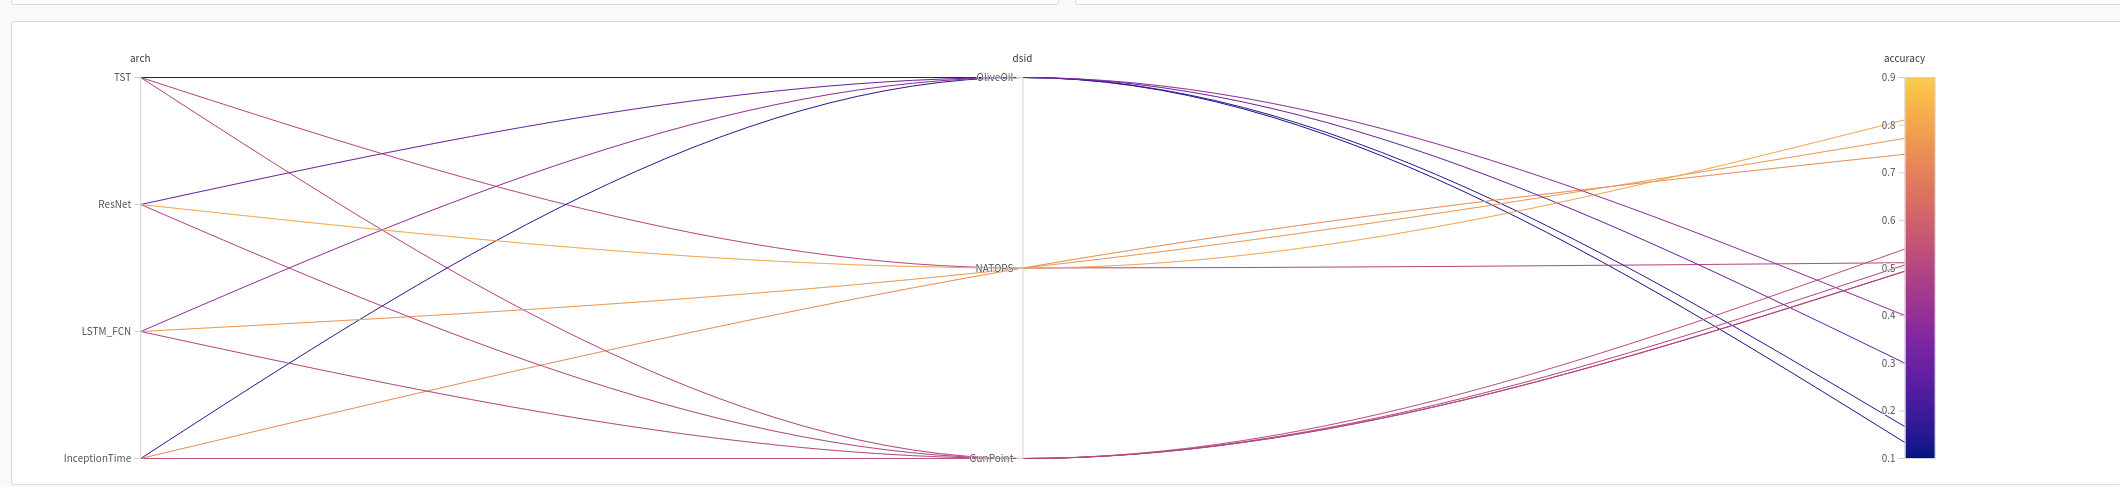